# Projeto 1 - Ciência dos Dados

Nome: André Barboza de Braga Melo

Nome: Rodrigo Anciães Patelli

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\andre\Downloads\Projeto-1-CDados-main\Projeto-1-CDados-main


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'League of Legends_classificado.xlsx'

In [4]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Relevância
0,nao aguento mais jogar league of legends,1
1,ainda vou enfartar jogando league of legends\n...,1
2,chegou a hora! está começando o primeiro episó...,0
3,@danielxd__1 • otaku viciado em doraminha core...,0
4,q dificil ser ruim nesse tal de league of legends,0


In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Relevância
0,meus top artistas do spotify nas últimas seman...,0
1,"""enquanto estiver de pé"" foi a música-tema do ...",0
2,grevtar monstro sagrado do league of legends n...,0
3,@pedroxdgameplay league of legends é de graça ...,1
4,red canids kalunga é a grande vencedora do cam...,0


# O código abaixo cria os data_frames necessários para a etapa 6

In [6]:
test_2 = test.rename(columns={'Teste': 'Treinamento'})


data_frames = [train, test_2]

combined = pd.concat(data_frames)
combined
#test_2

,Treinamento,Relevância
0,nao aguento mais jogar league of legends,1
1,ainda vou enfartar jogando league of legends\n...,1
2,chegou a hora! está começando o primeiro episó...,0
3,@danielxd__1 • otaku viciado em doraminha core...,0
4,q dificil ser ruim nesse tal de league of legends,0
...,...,...
195,@tecarnaval padrao do jogador de league of leg...,0
196,jogar de akali = felicidade no league of legen...,1
197,mais um dia de trabalho concluido nao sinto me...,0
198,@itsamedoug @pistolagirl1 vou ter que te dar u...,0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

ESCREVA AQUI... O produto que nós escolhemos é um videogame online muito famoso e popular chamado de League of Legends. Esse jogo tem um grande teor competitivo, porém sofre muito com toxicidade dos jogadores e ele é em geral grande alvo do ódio dos próprios jogadores. Para classifcar um tweet como relevante nós consideramos todos os que possuem opniões sobre o jogo como todo (desconsiderando opniões sobre personagens) e qualquer jogador chamando outro para jogar (oque poderia mostras atividade dos jogadores e popularidade do jogo) , ambas essas considerções podem mostrar uma visão de como está a popularidade do jogo e como estão reagindo a ele. Todos os tweets que não cumprem os requisistos ditos ateriormente serão classificados como irrelevantes

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [7]:
#Importando oque é permitido e nescessário
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_rows = 13
import re
import emoji


In [8]:
def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[!-.:?;|•]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed
    

In [9]:
#for frase in train['Treinamento']:
    #frase = cleanup(frase)
    #frase = emoji.demojize(frase)
    #teste = frase.split(' :')
    #teste = teste.split(':')
    #print(frase)
    #print(teste)
    #testando

In [10]:
trainR = train.loc[train['Relevância']==1]
trainR

,Treinamento,Relevância
0,nao aguento mais jogar league of legends,1
1,ainda vou enfartar jogando league of legends\n...,1
6,caraaaaaaaaaaaaaaaaaaaaaaaalho olha essa abert...,1
9,tuiter me sugeriu o tópico league of legends p...,1
10,independente de qm ganhar hj qm ganha é o leag...,1
...,...,...
489,"@kiffarr não laura kiffaz, prefiro 100 vidas c...",1
492,muita diversão nesse league of legends 🗣🤪🤬🤬🤬🤬🤬...,1
495,quero uma festa de aniversário com o tema leag...,1
497,hoje é dia do sexo\nvou jogar um league of leg...,1


In [11]:
len(trainR['Treinamento'])

240

In [12]:
trainI = train.loc[train['Relevância']==0]
trainI

,Treinamento,Relevância
2,chegou a hora! está começando o primeiro episó...,0
3,@danielxd__1 • otaku viciado em doraminha core...,0
4,q dificil ser ruim nesse tal de league of legends,0
5,quando minha ram chegar vou baforar muito leag...,0
7,é incrível a semelhança que eu tenho com a vex...,0
...,...,...
491,mano eu não acredito nisso kkkkjkkkkjjkk\n\nva...,0
493,@lumyng porque eu li league of legends é dia d...,0
494,@heartdan @delveracris tu faz desenho da rinha...,0
496,@marianagrazz jogue league of legends aí você ...,0


In [13]:
len(trainI['Treinamento'])

260

# O classificador abaixo foi feito para averiguar a eficiencia teorica

# Ele está classificando os tweets da própria base que ele usa pro  treinamento

In [14]:
#Classificador feito para averiguar a eficiencia teorica
#Ele está classificando os tweets da própria base que ele usa pro  treinamento



def classificador(train, tweets):
    
    stopwords = ['a','o','da','de','do','e']
    
    trainR = train.loc[train['Relevância']==1]
    trainI = train.loc[train['Relevância']==0]
    
    lista_total = ''    
    for frase in train[tweets]:
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        lista_total += frase
    lista_total = lista_total.split(' ')
    
    for word in lista_total:
        for stopword in stopwords:
            if stopword in lista_total:
                lista_total.remove(stopword)
            

    #lista_total
    serie_total = pd.Series(lista_total)

    
    lista_re = ''
    for frase in trainR[tweets]:
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        lista_re += frase
    lista_re = lista_re.split(' ')
    #lista_re
    serie_re = pd.Series(lista_re)
    
    lista_ir = ''
    for frase in trainI[tweets]:
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        lista_ir += frase
    lista_ir = lista_ir.split(' ')
    #lista_ir
    serie_ir = pd.Series(lista_ir)
    
    frequencia_total = serie_total.value_counts()
    frequencia_re = serie_re.value_counts()
    frequencia_ir = serie_ir.value_counts()
    
    probR = len(lista_re)/len(lista_total)
    probI = len(lista_ir)/len(lista_total)
    
    #relevante
    l_teste = []
    for frase in train[tweets]:
        prob_frase_R = 1
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        palavras = frase.split(' ')    
        for palavra in palavras:
            if palavra in frequencia_re:
                pro = (frequencia_re[palavra]+1)/(len(frequencia_re) + len(frequencia_total))
                #print('funciona')
            else:
                pro = 1/(len(frequencia_re) + len(frequencia_total)) #Esse daqui é um TESTE pra suavização, não foi feito com o objetivo de estar certo
                #print('funciona tbm')
            prob_frase_R *= pro
        l_teste.append(prob_frase_R * probR)
        
    #Irelevante
    IR_teste = []
    for frase in train[tweets]:
        prob_frase_IR = 1
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        palavras = frase.split(' ')
    
        for palavra in palavras:
            if palavra in frequencia_ir:
                pro = (frequencia_ir[palavra]+1)/(len(frequencia_ir) + len(frequencia_total))
                #print('funciona')
            else:
                pro = 1/(len(frequencia_ir) + len(frequencia_total)) #Esse daqui é um TESTE pra suavização, não foi feito com o objetivo de estar certo
                #print('funciona tbm')
            prob_frase_IR *= pro
        IR_teste.append(prob_frase_IR * probI)
        
    i = 0
    classificacao = []
    while i < len(train[tweets]):
        qual_e = 1
        if l_teste[i]< IR_teste[i]:
            cl = 0
        else:
            cl = 1
        
        classificacao.append(cl)
        i += 1
    
    final_train = train
    final_train['classificador'] = classificacao
   
    
    return final_train
    




# O classificador ABAIXO é mais útil, ele usa a base de treinamento para aprender e depois classifica a base de dados escolhida

# Ele utiliza para aprender apenas a base de treinamento


In [15]:

#Esse classificador é mais útil, ele usa a base de treinamento para aprender e depois classifica a base de dados escolhida
#Ele utiliza para aprender apenas a base de treinamento

def classificador_aprende(train, tweets, teste, tweets_teste):
    
    stopwords = ['a','o','da','de','do','e']
    
    trainR = train.loc[train['Relevância']==1]
    trainI = train.loc[train['Relevância']==0]
    
    lista_total = ''    
    for frase in train[tweets]:
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        lista_total += frase
    lista_total = lista_total.split(' ')
    
    
    for word in lista_total:
        for stopword in stopwords:
            if stopword in lista_total:
                lista_total.remove(stopword)
            
            
    #lista_total
    serie_total = pd.Series(lista_total)

    
    lista_re = ''
    for frase in trainR[tweets]:
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        lista_re += frase
    lista_re = lista_re.split(' ')
    #lista_re
    serie_re = pd.Series(lista_re)
    
    lista_ir = ''
    for frase in trainI[tweets]:
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        lista_ir += frase
    lista_ir = lista_ir.split(' ')
    #lista_ir
    serie_ir = pd.Series(lista_ir)
    
    frequencia_total = serie_total.value_counts()
    frequencia_re = serie_re.value_counts()
    frequencia_ir = serie_ir.value_counts()
    
    probR = len(lista_re)/len(lista_total)
    probI = len(lista_ir)/len(lista_total)
    
    #relevante
    l_teste = []
    for frase in teste[tweets_teste]:
        prob_frase_R = 1
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        palavras = frase.split(' ')    
        for palavra in palavras:
            if palavra in frequencia_re:
                pro = (frequencia_re[palavra]+1)/(len(frequencia_re) + len(frequencia_total))
                #print('funciona')
            else:
                pro = 1/(len(frequencia_re) + len(frequencia_total)) #Esse daqui é um TESTE pra suavização, não foi feito com o objetivo de estar certo
                #print('funciona tbm')
            prob_frase_R *= pro
        l_teste.append(prob_frase_R * probR)
        
    #Irelevante
    IR_teste = []
    for frase in teste[tweets_teste]:
        prob_frase_IR = 1
        frase = emoji.demojize(frase)
        frase.strip('\n')
        frase = cleanup(frase)
        palavras = frase.split(' ')
    
        for palavra in palavras:
            if palavra in frequencia_ir:
                pro = (frequencia_ir[palavra]+1)/(len(frequencia_ir) + len(frequencia_total))
                #print('funciona')
            else:
                pro = 1/(len(frequencia_ir) + len(frequencia_total)) #Esse daqui é um TESTE pra suavização, não foi feito com o objetivo de estar certo
                #print('funciona tbm')
            prob_frase_IR *= pro
        IR_teste.append(prob_frase_IR * probI)
        
    i = 0
    classificacao = []
    while i < len(teste[tweets_teste]):
        qual_e = 1
        if l_teste[i]< IR_teste[i]:
            cl = 0
        else:
            cl = 1
        
        classificacao.append(cl)
        i += 1
    
    final_train = teste
    final_train['classificador'] = classificacao
    
    return final_train

In [16]:
#-------------------------------------------------------------------------------------------------------------------------------

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

# Primeiramente vamos averiguar a eficiencia do classificador classificando a própria base que ele usa para aprender

In [17]:
test_classf = classificador(test, 'Teste') #Obs nós usamos o próprio teste como treinamento apensas para o teste da funcionalidade

In [18]:
test_classf

,Teste,Relevância,classificador
0,meus top artistas do spotify nas últimas seman...,0,0
1,"""enquanto estiver de pé"" foi a música-tema do ...",0,0
2,grevtar monstro sagrado do league of legends n...,0,0
3,@pedroxdgameplay league of legends é de graça ...,1,1
4,red canids kalunga é a grande vencedora do cam...,0,0
...,...,...,...
195,@tecarnaval padrao do jogador de league of leg...,0,0
196,jogar de akali = felicidade no league of legen...,1,1
197,mais um dia de trabalho concluido nao sinto me...,0,0
198,@itsamedoug @pistolagirl1 vou ter que te dar u...,0,0


In [19]:
#Essa parte de baixo é só um teste que funciona só com o treinamneto para classificar

In [20]:
analise_t = pd.crosstab(test_classf['Relevância'], test_classf['classificador'],normalize=True)
analise_t


classificador,0,1
Relevância,,
0,0.595,0.015
1,0.035,0.355


In [21]:
pctg_verd_posit = analise_t.iloc[1,1]/(analise_t.iloc[1,1] + analise_t.iloc[1,0])
pctg_falso_negat = analise_t.iloc[1,0]/(analise_t.iloc[1,1] + analise_t.iloc[1,0])
pctg_verd_negat = analise_t.iloc[0,0]/(analise_t.iloc[0,0] + analise_t.iloc[0,1])
pctg_falso_posit = analise_t.iloc[0,1]/(analise_t.iloc[0,0] + analise_t.iloc[0,1])

print('O classificador acertou a classificação de {0:.2f} das mensagens irrelevantes e errou {1:.2f}'.format(pctg_verd_negat,pctg_falso_posit))

O classificador acertou a classificação de 0.98 das mensagens irrelevantes e errou 0.02


In [22]:
print('O classificador acertou a classificação de {0:.2f} das mensagens relevantes e errou {1:.2f}'.format(pctg_verd_posit,pctg_falso_negat))

O classificador acertou a classificação de 0.91 das mensagens relevantes e errou 0.09


In [23]:
total = (analise_t.iloc[1,1] + analise_t.iloc[1,0])+(analise_t.iloc[0,0] + analise_t.iloc[0,1])

acuracia = (analise_t.iloc[0,0] + analise_t.iloc[1,1]) / total

print('A precisão total do classificador foi de {0:.2f}'.format(acuracia))

A precisão total do classificador foi de 0.95


# Agora na céluslas de baixo será testado o classificador que aprende com o treinamento e usa oque obteve para classificar o teste

In [24]:
test_classf_aprende = classificador_aprende(train,'Treinamento', test, 'Teste')

In [25]:
test_classf_aprende

,Teste,Relevância,classificador
0,meus top artistas do spotify nas últimas seman...,0,1
1,"""enquanto estiver de pé"" foi a música-tema do ...",0,0
2,grevtar monstro sagrado do league of legends n...,0,0
3,@pedroxdgameplay league of legends é de graça ...,1,0
4,red canids kalunga é a grande vencedora do cam...,0,0
...,...,...,...
195,@tecarnaval padrao do jogador de league of leg...,0,0
196,jogar de akali = felicidade no league of legen...,1,1
197,mais um dia de trabalho concluido nao sinto me...,0,1
198,@itsamedoug @pistolagirl1 vou ter que te dar u...,0,0


In [26]:
analise_tap = pd.crosstab(test_classf_aprende['Relevância'], test_classf_aprende['classificador'],normalize=True)
analise_tap

classificador,0,1
Relevância,,
0,0.415,0.195
1,0.170,0.220


In [27]:
pctg_verd_positap = analise_tap.iloc[1,1]/(analise_tap.iloc[1,1] + analise_tap.iloc[1,0])
pctg_falso_negatap = analise_tap.iloc[1,0]/(analise_tap.iloc[1,1] + analise_tap.iloc[1,0])
pctg_verd_negatap = analise_tap.iloc[0,0]/(analise_tap.iloc[0,0] + analise_tap.iloc[0,1])
pctg_falso_positap = analise_tap.iloc[0,1]/(analise_tap.iloc[0,0] + analise_tap.iloc[0,1])

print('O classificador acertou a classificação de {0:.2f} das mensagens irrelevantes e errou {1:.2f}'.format(pctg_verd_negatap,pctg_falso_positap))

O classificador acertou a classificação de 0.68 das mensagens irrelevantes e errou 0.32


In [28]:
print('O classificador acertou a classificação de {0:.2f} das mensagens relevantes e errou {1:.2f}'.format(pctg_verd_positap,pctg_falso_negatap))

O classificador acertou a classificação de 0.56 das mensagens relevantes e errou 0.44


In [29]:
totalap = (analise_tap.iloc[1,1] + analise_tap.iloc[1,0])+(analise_tap.iloc[0,0] + analise_tap.iloc[0,1])

acuraciaap = (analise_tap.iloc[0,0] + analise_tap.iloc[1,1]) / totalap

print('A precisão total do classificador foi de {0:.2f}'.format(acuraciaap))

A precisão total do classificador foi de 0.64


___
### Concluindo

Após a criação e testes feitos no classificador foi possível de se perceber suas peculiaridades, incluindo seus pontos fortes e fracos.

Ao fazer com que o classificador fizesse um teste na própria base de treinamento ele obtve resultados impressionantes de 95% de acertos, o que nos mostrou que a teoria do classsificador funciona bem se este conhecesse todas as palavras que ele deveria analisar.

Por outro lado, quando o classifcador tentou classificar uma base de dados toalmente nova ele obteve problemas, fazendo com que sua precisão caisse para 64%, isso se deve a uma variadede de motivos que podem ter causado essa queda de eficácia, sendo eles:

- O classificador não conhecia todas as palavras que ele deveria analizar oque afetou negativamente na precisão, uma vez que ele atribuia uma probabilidade padrão e baixa a elas oque afetava no conjunto da frase

- Duplas negações e sarcasmos mais frequentes, são acontecimentos que amplificavam erroneamente a probabilidade de ser irrelevante uma vez que as palavras dos tweets são analisadas individulamente, oque torna o classificador incapaz de anailsar contextos criando uma situação em que todo sarcasmo é tratado como uma afirmação verdadeira assim como as duplas negações, oque explica porque apenas 56% das mensagens relevantes foram classificadas corretamente.



Esses resulatdos mostram que apesar das dificuldades, o classificador ainda pode ser aprimorado em pontos específicos que melhorariam muito seu resulatado, como o aumento considerável da base de dados de treinamneto, para que este conhecesse a maioria das palvras que ele encontrasse e também a aplicação de um sistema capaz de analisar a frase como um todo, indentificando contextos e peculiaridades, sendo um projeto viável a se continuar e aprimorar com probabilidade de grandes retornos.

# Notas adicionais

Porque não podemos usar o classificador para gerar novas amostras de treinamentos?

seria imprudente utilizar do próprio classificador para criar bases de treinamento por diversos motivos, entre eles:

- O classificador apresenta uam imprecisãp padrão oque faz com que ele naturalmente cometa erros, oque pode prejudicar bases de treinamento, uma vez que indizirá o classificador a cometer mais erros e com o tempo esse erro pode se tornar muito frequente, estragando completamente a precisão do classificador que usar as novas bases que foram criadas

- O classificador também sofreria ainda mais com sarcasmos e duplas negações, facilmente compreensíveis por humanos, mas que podem gerar erros caso essa criação seja feita pelo próprio classificador, guardando assim no treinamento multiplas mensagenes com classificações erroneas, oque farão errar novamente.


Resumindo: qualquer erro que o classificador cometesse ao classifcar tweets para o treinamento estaria pemanentemente vinculado a ele, aumentando cada vez mais a quantidade de erros comentidos, com base na quantidade de tweets de treinamneto que ele tentar classificar.

Para que poderíamos utilizar esse classificador?

  O uso mais simples para esse classificador seria o de classificar tweets para que esses fossem analizados pela área de marketing de uma empresa, eliminando tweets inuteis para a analise e possivel tomada de decisões.

  Porém esse classificado podería também ja atuar em união a outros em um sistema que este eliminasse mensagens irrelevantes e outro classificador classificasse como por exemplo 'falando bem' ou 'falando mal', sendo util para pesquisas em grandes bases de dados que não possuem respostas padronizadas, lidando assim com a variação das formas de espressão que as pessoa podem utilzar.
  
  Esse classificador, por outro lado seria inutil para base de dados com respostas padronizadas ou muito semelhantes, ou seja, caso ja for de conhecimento que todas as mensagens da base são de importancia.
  
  Esse classificador poderia servir também para a organização de um relatório de tudo que acontece em uma fabrica ou empresa, filtrando acontecimentos relevantes i irrelevantes, facilitando uma anailse posterior.



___
# Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [30]:
#Teste

#Dispõe as linhas em ordem aleatória
embaralhado = combined.sample(frac=1)
embaralhado

,Treinamento,Relevância
101,era só um league of legends💨💨💨💨,0
430,eu odeio league of legends,1
51,@juniorsteffens1 jogadores de league of legend...,1
19,"league of legends e stress? aqui não, bora de ...",1
244,@_0karin @dajsdh006fdusoa um verdadeiro gamer ...,1
...,...,...
268,"pessoas, vou abrir um league of legends com o ...",0
148,@rogerwitt_ o que são essas coisas normais? pa...,0
160,@rodrigozoide aquele meme do linux não rodar l...,0
104,@zebertolol1 aposentou de league of legends e ...,1


In [31]:
embaralhado.iloc[0:400,:]

,Treinamento,Relevância
101,era só um league of legends💨💨💨💨,0
430,eu odeio league of legends,1
51,@juniorsteffens1 jogadores de league of legend...,1
19,"league of legends e stress? aqui não, bora de ...",1
244,@_0karin @dajsdh006fdusoa um verdadeiro gamer ...,1
...,...,...
151,imagine você não ter 1 dos braços comprar um b...,1
466,a cada dia que passa o league of legends retir...,1
174,o windows reiniciou seu driver de placa de víd...,0
121,"@themainninth mas tem ótimo gameplay, fluido, ...",1


In [32]:
embaralhado.iloc[400:700,:]

,Treinamento,Relevância
106,@leopacheco44 teu conhecimento sobre league of...,0
295,muito legal esse tal de league of legends http...,1
8,thumbnails de league of legends!\nvalor do ser...,0
433,se a red perder esse jogo eu n sei nada de lea...,0
240,pov: voce nao joga league of legends https://t...,0
...,...,...
268,"pessoas, vou abrir um league of legends com o ...",0
148,@rogerwitt_ o que são essas coisas normais? pa...,0
160,@rodrigozoide aquele meme do linux não rodar l...,0
104,@zebertolol1 aposentou de league of legends e ...,1


In [110]:
n = 0

data_classf = []

analise_classf = []

acuracy  = []

while n < 100:
    
    embaralhado = combined.sample(frac=1)
    train_shuffle = embaralhado.iloc[0:400,:]
    test_shuffle = embaralhado.iloc[400:700,:]
    test_shuffle = test_shuffle.rename(columns={'Treinamento': 'Teste'})
    
    classf_shuffle = classificador_aprende(train_shuffle,'Treinamento', test_shuffle, 'Teste')
    
    data_classf.append(classf_shuffle)
    
    analise_shuffle = pd.crosstab(classf_shuffle['Relevância'], classf_shuffle['classificador'],normalize=True)
    
    analise_classf.append(analise_shuffle)
    
    pctg_verd_posit_shuffle = analise_shuffle.iloc[1,1]/(analise_shuffle.iloc[1,1] + analise_shuffle.iloc[1,0])
    pctg_falso_negat_shuffle = analise_shuffle.iloc[1,0]/(analise_shuffle.iloc[1,1] + analise_shuffle.iloc[1,0])
    pctg_verd_negat_shuffle = analise_shuffle.iloc[0,0]/(analise_shuffle.iloc[0,0] + analise_shuffle.iloc[0,1])
    pctg_falso_posit_shuffle = analise_shuffle.iloc[0,1]/(analise_shuffle.iloc[0,0] + analise_shuffle.iloc[0,1])
    pctg_verdadeira_total = (analise_shuffle.iloc[1,1] + analise_shuffle.iloc[0,0])/1
    
    acuracy.append([pctg_verd_posit_shuffle, pctg_falso_negat_shuffle, pctg_verd_negat_shuffle, pctg_falso_posit_shuffle, pctg_verdadeira_total])
    
    print('Loading {0:}%...'.format(n+1))
    
    n += 1
    

Loading 1%...
Loading 2%...
Loading 3%...
Loading 4%...
Loading 5%...
Loading 6%...
Loading 7%...
Loading 8%...
Loading 9%...
Loading 10%...
Loading 11%...
Loading 12%...
Loading 13%...
Loading 14%...
Loading 15%...
Loading 16%...
Loading 17%...
Loading 18%...
Loading 19%...
Loading 20%...
Loading 21%...
Loading 22%...
Loading 23%...
Loading 24%...
Loading 25%...
Loading 26%...
Loading 27%...
Loading 28%...
Loading 29%...
Loading 30%...
Loading 31%...
Loading 32%...
Loading 33%...
Loading 34%...
Loading 35%...
Loading 36%...
Loading 37%...
Loading 38%...
Loading 39%...
Loading 40%...
Loading 41%...
Loading 42%...
Loading 43%...
Loading 44%...
Loading 45%...
Loading 46%...
Loading 47%...
Loading 48%...
Loading 49%...
Loading 50%...
Loading 51%...
Loading 52%...
Loading 53%...
Loading 54%...
Loading 55%...
Loading 56%...
Loading 57%...
Loading 58%...
Loading 59%...
Loading 60%...
Loading 61%...
Loading 62%...
Loading 63%...
Loading 64%...
Loading 65%...
Loading 66%...
Loading 67%...
Load

In [111]:
data_classf[0]

,Teste,Relevância,classificador
110,minha coach pessoal de league of legends 🤪✋ ht...,0,1
465,eu odeio o league of legends,1,1
353,a red vai mostrar pros chineses e corean playe...,0,0
417,@gyawhi amg sim??? um dia me acordaram no meio...,0,1
133,acontecendo uma coisa chata no league of legends,1,0
...,...,...,...
102,𝐇oje comecei a jogar um jogo de computador dev...,1,1
420,"4 jogos que parecem league of legends,mas não ...",0,0
496,@marianagrazz jogue league of legends aí você ...,0,1
297,nao aguento mais lol cara se eu ver mais 1 twe...,1,1


In [112]:
analise_classf[0]

classificador,0,1
Relevância,,
0,0.393333,0.100000
1,0.203333,0.303333


In [114]:
print('{0:.2f}'.format(acuracy[5][4]))
pctg_certo = []
for x in np.arange(0,int(len(acuracy)),1):
    pctg_certo.append((acuracy[x][4])*100)
print(pctg_certo[0])

0.71
69.66666666666667


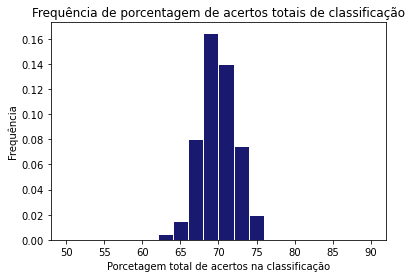

In [115]:
x = np.arange(50,91,2)


plt.hist(pctg_certo, bins=x, edgecolor='white', density=True,color = "MIDNIGHTblue")
plt.title('Frequência de porcentagem de acertos totais de classificação')
plt.ylabel('Frequência')
plt.xlabel('Porcetagem total de acertos na classificação')
plt.show()

# Conclusão após os 100 testes

   após essa etapa de aperfeiçoamento foi possível notar um detalhe ja discutido na conclusão anterior, este que é: o classificador não conhecer palavras específicas pode afetar muito o resultado.
    
   Ao embraralhar os dataframes para criar novos teste e treinamento, cada vez era feita uma nova distribuição das palavras através deles criando diversas situações diferentes para o teste, que na maioria dos casos foi surpreendentemente melhor do que o original, possuindo também a média de acertos acima do teste original, mostrando que este podia ter uma distribuição inoportuna dos tweets implicando no fato de que algumas espressões podem ter ficado muito concentradas apenas em um dos dataframes, afetando seu resultado.
    
   Esse acontecimento mostra a importância da criação de diversos treinamnetos e testes, para que assim possa-se buscar situações em que expressões tenham sido melhor abrangidas e assim melhorem sua precisão, sem que seja nescessário grandes aprimoramentos tecnicos.
   



___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**